In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ex1data1.txt')

In [3]:
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


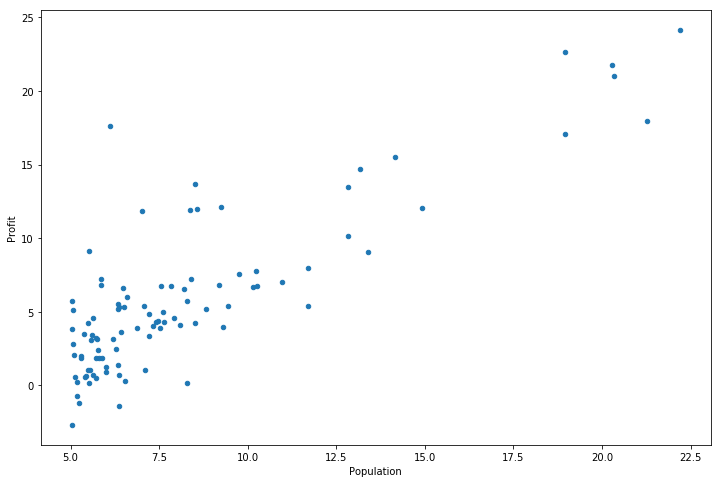

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

## Linear Regression

In [43]:
def computeCost(X, y, theta):
    """
    Implement cost function
    """
    inner = np.power((X*theta.T - y), 2)
    m = len(X) # since X is an m x n matrix.
    return np.sum(inner) / (2 * m)

Here's an example of the above.

In [17]:
X = [[1,2,4,2],[1,5,7,2]]
theta = [4,6,32,7]
y = [2,2]

In [18]:
X = np.matrix(X)
theta = np.matrix(theta)
y = np.matrix(y)

In [21]:
y

matrix([[2, 2]])

In [25]:
inner = np.power(X * theta.T - y.T, 2)

In [27]:
inner

matrix([[24336],
        [72900]], dtype=int32)

In [26]:
np.sum(inner)

97236

To make data work w/ this, need to manipulate a bit.

In [28]:
data.insert(0,'Ones',1)

In [29]:
data.shape

(97, 3)

In [30]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [37]:
data.iloc[1,1] # so we see that this is iloc[r,c] where r = row, c = column.

5.5277000000000003

So we want X to be a matrix that includes Ones and Population, while y is the column containing just Profit.

In [38]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1] # all rows, just Ones and Population Columns
y = data.iloc[:, cols-1:cols] # just the final column, but all rows

In [39]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


Now we make these into numpy matrices, make a parameter matrix (theta_0, theta_1)

In [40]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [41]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [44]:
computeCost(X,y,theta)

32.072733877455676

woof

In [47]:
a = theta.ravel()

In [48]:
a

matrix([[0, 0]])

In [52]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    params = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - y # X * theta.T is our hypothesis function
        
        for j in range(params):
            # update each parameter
            term = np.multiply(error, X[:,j]) 
            # this is  training examples of (hyp - y(i))x_j(i), matrix so we need to take a sum.
            temp[0,j] = temp[0,j] - (alpha / len(X)) * np.sum(term)
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost

In [53]:
# let's test this
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [54]:
computeCost(X,y,g)

4.5159555030789118

In [56]:
data.Population

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
5      8.3829
6      7.4764
7      8.5781
8      6.4862
9      5.0546
10     5.7107
11    14.1640
12     5.7340
13     8.4084
14     5.6407
15     5.3794
16     6.3654
17     5.1301
18     6.4296
19     7.0708
20     6.1891
21    20.2700
22     5.4901
23     6.3261
24     5.5649
25    18.9450
26    12.8280
27    10.9570
28    13.1760
29    22.2030
       ...   
67    10.2360
68     5.4994
69    20.3410
70    10.1360
71     7.3345
72     6.0062
73     7.2259
74     5.0269
75     6.5479
76     7.5386
77     5.0365
78    10.2740
79     5.1077
80     5.7292
81     5.1884
82     6.3557
83     9.7687
84     6.5159
85     8.5172
86     9.1802
87     6.0020
88     5.5204
89     5.0594
90     5.7077
91     7.6366
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

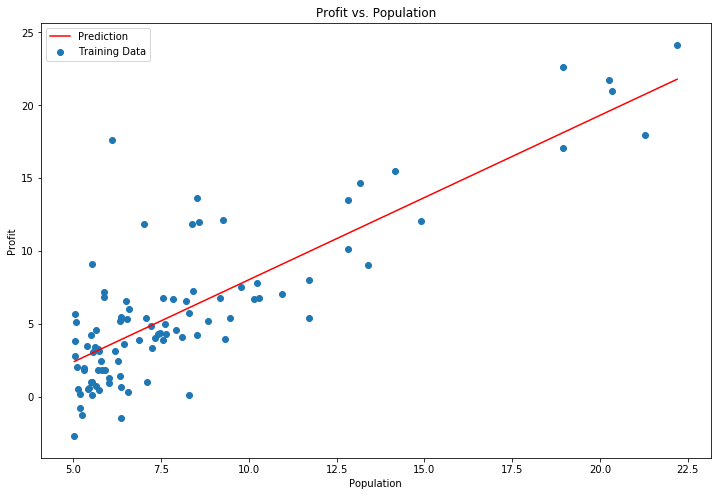

In [59]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1]*x) # this is theta_0 + theta_1 * x

fig, axis = plt.subplots(figsize=(12,8))
axis.plot(x,f, 'r', label='Prediction')
axis.scatter(data.Population, data.Profit, label='Training Data')
axis.legend(loc=2)
axis.set_xlabel('Population')
axis.set_ylabel('Profit')
axis.set_title('Profit vs. Population')

Now let's plot the loss.

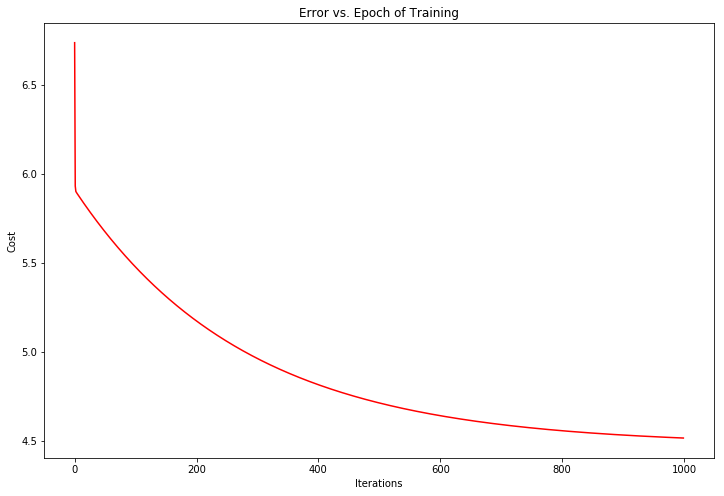

In [60]:
figure, axis = plt.subplots(figsize=(12,8))
axis.plot(np.arange(iters), cost, 'r')
axis.set_xlabel('Iterations')
axis.set_ylabel('Cost')
axis.set_title('Error vs. Epoch of Training')

# Multiple Variables!

In [64]:
path = os.path.join(os.getcwd(), 'data', 'ex1data2.txt')

In [65]:
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [66]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Let's normalize the features.

In [68]:
data2.std()

Size           794.702354
Bedrooms         0.760982
Price       125039.899586
dtype: float64

In [70]:
data2 = (data2 - data2.mean()) / data2.std()

In [71]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Turns out no need to change gradDescent, computeCost.

In [72]:
data2.insert(0, 'Ones', 1)

In [77]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [89]:
cols = data2.shape[1]
X2 = data2.iloc[ : , 0:cols-1]
y2 = data2.iloc[ : , cols-1:cols]

In [90]:
X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [91]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [92]:
g2, cost2 = gradientDescent(X2,y2,theta2,alpha,iters)

In [93]:
computeCost(X2,y2,g2)

0.13070336960771892

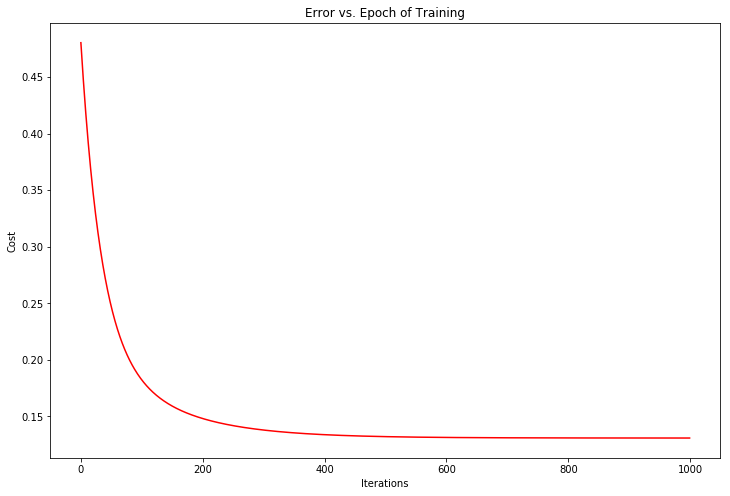

In [94]:
figure, axis = plt.subplots(figsize=(12,8))
axis.plot(np.arange(iters), cost2, 'r')
axis.set_xlabel('Iterations')
axis.set_ylabel('Cost')
axis.set_title('Error vs. Epoch of Training')

# Sklearn (Scrub ver)

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X,y)